In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
feature_id = 9011

In [3]:
RT_LIMIT_LOWER = 4340
RT_LIMIT_UPPER = 4580

In [4]:
BASE_NAME = "/home/ubuntu/HeLa_20KInt-rt-{}-{}".format(RT_LIMIT_LOWER,RT_LIMIT_UPPER)
CONVERTED_DATABASE_NAME = '{}/HeLa_20KInt.sqlite'.format(BASE_NAME)
SUMMED_REGIONS_DATABASE = '{}/HeLa_20KInt-features-{}-{}.sqlite'.format(BASE_NAME, feature_id, feature_id)

In [5]:
# get the feature's base peak id
db_conn = sqlite3.connect(SUMMED_REGIONS_DATABASE)
feature_list_df = pd.read_sql_query("select * from feature_list where feature_id={}".format(feature_id), db_conn)
db_conn.close()
if len(feature_list_df) > 0:
    base_peak_id = feature_list_df.iloc[0].base_peak_id.astype(int)
else:
    print("Empty feature list.")

In [6]:
base_peak_id

1

In [7]:
db_conn = sqlite3.connect(SUMMED_REGIONS_DATABASE)
feature_isotopes_df = pd.read_sql_query("select * from feature_isotopes where feature_id={}".format(feature_id), db_conn)
db_conn.close()

In [8]:
feature_isotopes_df

,feature_id,feature_region_peak_id,centroid_scan,centroid_rt,centroid_mz,peak_summed_intensity
0,9011,1,432.011901,4459.832458,848.936982,6050
1,9011,2,434.000000,4457.414160,849.433771,1069


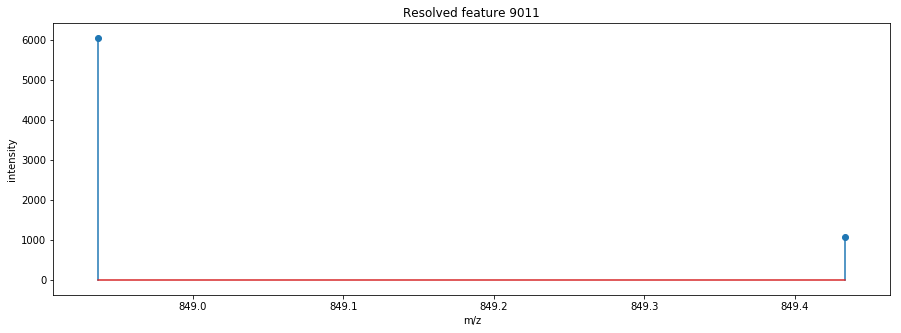

In [9]:
f, ax = plt.subplots()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
ax.stem(feature_isotopes_df.centroid_mz, feature_isotopes_df.peak_summed_intensity)
plt.xlabel('m/z')
plt.ylabel('intensity')
f.set_figheight(5)
f.set_figwidth(15)
plt.margins(0.06)
plt.title('Resolved feature {}'.format(feature_id))
plt.show()

In [10]:
db_conn = sqlite3.connect(CONVERTED_DATABASE_NAME)
df = pd.read_sql_query("select * from summed_frames where (frame_id,peak_id) in (select frame_id,peak_id from peaks where (frame_id,cluster_id) in (select frame_id,cluster_id from clusters where feature_id=={}))".format(feature_id), db_conn)
df["marker_size"] = (((np.log(df.intensity)-5)*2)**2)*4
db_conn.close()

In [11]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Rescale to values between 0 and 1
tableau20_mpl = tableau20.copy()
for i in range(len(tableau20_mpl)):  
    r, g, b = tableau20_mpl[i]  
    tableau20_mpl[i] = (r / 255., g / 255., b / 255.)

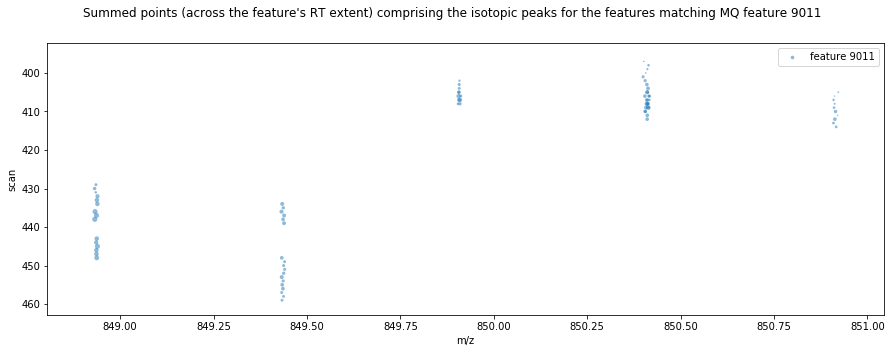

In [12]:
f, ax = plt.subplots()
ax.scatter(df.mz, df.scan, marker='.', color=tableau20_mpl[0], lw=0, s=df.marker_size, alpha=0.5, label="feature {}".format(feature_id))
plt.legend(loc='best')
plt.xlabel('m/z')
plt.ylabel('scan')
plt.gca().invert_yaxis()
f.set_figheight(5)
f.set_figwidth(15)
plt.suptitle('Summed points (across the feature\'s RT extent) comprising the isotopic peaks for the features matching MQ feature {}'.format(feature_id))
plt.margins(0.06)
plt.show()